# Método dos Mínimos Quadrados

O código que se encontra em baixo utiliza o método de eliminação de Gauss e o método dos mínimos quadrados para 
determinar os coeficientes de uma função de ajustamento. Neste código usámos as funções componentes e a base de 
dados que o professor disponibilizou.

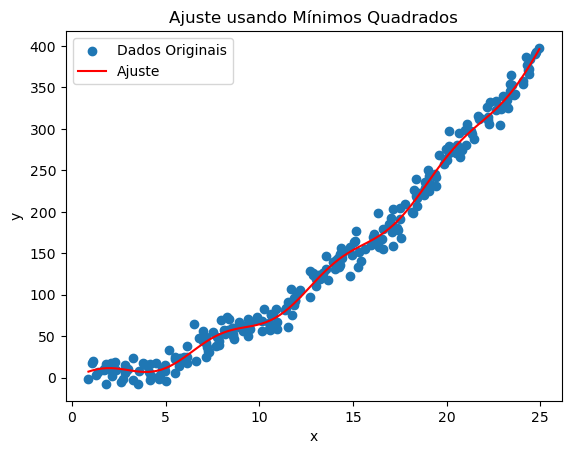

Coeficientes: [8.18483808 0.66743667 0.60903832 0.5205613 ]
Erro Total: 26584.942108982876


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def gauss_elimination(A, b):
   
    n = len(b)

    # Eliminação para formar a matriz triangular superior
    for i in range(n):
        # Dividir a linha toda pelo pivô para tornar o pivô igual a 1
        pivot = A[i][i]
        for j in range(i, n):
            A[i][j] /= pivot
        b[i] /= pivot

        # Eliminação
        for j in range(i + 1, n):
            factor = A[j][i]
            for k in range(i, n):
                A[j][k] -= factor * A[i][k]
            b[j] -= factor * b[i]

    # Substituição retroativa
    x = [0] * n
    for i in range(n - 1, -1, -1):
        x[i] = b[i]
        for j in range(i + 1, n):
            x[i] -= A[i][j] * x[j]

    return x


def ajuste_mmq(x, y, g_funcs):
    N = len(x)
    A = [[g(xi) for g in g_funcs] for xi in x]
    ATA = np.dot(np.transpose(A), A)
    ATy = np.dot(np.transpose(A), y)
    a = np.linalg.solve(ATA, ATy)
    f_ajuste = lambda xi: sum(ai * g(xi) for ai, g in zip(a, g_funcs))
    return a, f_ajuste


def ler_dados(nome_arquivo):
    df = pd.read_csv(nome_arquivo)
    x = df['x'].values
    y = df['y'].values
    return x, y


# Suponha que os dados estejam no arquivo 'g1data(1).csv' com colunas 'x' e 'y'.
nome_arquivo = 'g1data(1).csv'
x, y = ler_dados(nome_arquivo)

# Funções de ajuste 
g_funcs = [lambda x: np.sin(x), lambda x: x, lambda x: x**2, lambda x: np.log(x)]

a, f_ajuste = ajuste_mmq(x, y, g_funcs)
y_ajustado = f_ajuste(x)

# Plotando os dados e o ajuste
plt.scatter(x, y, label='Dados Originais')
x_plot = np.linspace(min(x), max(x), 100)
y_plot = f_ajuste(x_plot)
plt.plot(x_plot, y_plot, label='Ajuste', color='red')
plt.legend()
plt.title('Ajuste usando Mínimos Quadrados')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

erro_total = np.sum((y - y_ajustado) ** 2)
print(f'Coeficientes: {a}')
print(f'Erro Total: {erro_total}')

In [ ]:
Aqui se encontra o segundo exemplo do método dos mínimos quadrados com três funções componentes inventadas,
recorrendo na mesma à base de dados disponibilizada.

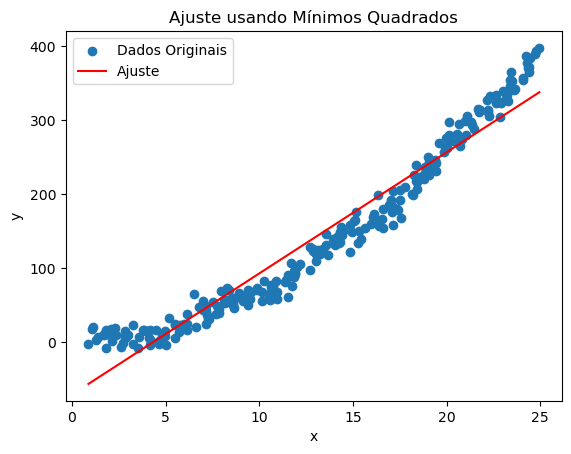

Coeficientes: [-155.181994     28.39545069  106.27932961]
Erro Total: 198993.40161110822


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def gauss_elimination(A, b):
   
    n = len(b)

    # Eliminação para formar a matriz triangular superior
    for i in range(n):
        # Dividir a linha toda pelo pivô para tornar o pivô igual a 1
        pivot = A[i][i]
        for j in range(i, n):
            A[i][j] /= pivot
        b[i] /= pivot

        # Eliminação
        for j in range(i + 1, n):
            factor = A[j][i]
            for k in range(i, n):
                A[j][k] -= factor * A[i][k]
            b[j] -= factor * b[i]

    # Substituição retroativa
    x = [0] * n
    for i in range(n - 1, -1, -1):
        x[i] = b[i]
        for j in range(i + 1, n):
            x[i] -= A[i][j] * x[j]

    return x


def ajuste_mmq(x, y, g_funcs):
    N = len(x)
    A = [[g(xi) for g in g_funcs] for xi in x]
    ATA = np.dot(np.transpose(A), A)
    ATy = np.dot(np.transpose(A), y)
    a = np.linalg.solve(ATA, ATy)
    f_ajuste = lambda xi: sum(ai * g(xi) for ai, g in zip(a, g_funcs))
    return a, f_ajuste



def ler_dados(nome_arquivo):
    df = pd.read_csv(nome_arquivo)
    x = df['x'].values
    y = df['y'].values
    return x, y


# Suponha que os dados estejam no arquivo 'g1data(1).csv' com colunas 'x' e 'y'.
nome_arquivo = 'g1data(1).csv'
x, y = ler_dados(nome_arquivo)

# Funções de ajuste 
g_funcs = [lambda x: x*3, lambda x: x*2 + 5, lambda x: x*4 - 2]

a, f_ajuste = ajuste_mmq(x, y, g_funcs)
y_ajustado = f_ajuste(x)

# Plotando os dados e o ajuste
plt.scatter(x, y, label='Dados Originais')
x_plot = np.linspace(min(x), max(x), 100)
y_plot = f_ajuste(x_plot)
plt.plot(x_plot, y_plot, label='Ajuste', color='red')
plt.legend()
plt.title('Ajuste usando Mínimos Quadrados')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

erro_total = np.sum((y - y_ajustado) ** 2)
print(f'Coeficientes: {a}')
print(f'Erro Total: {erro_total}')

In [ ]:
Por fim, vamos apresentar um código geral, onde se pode introduzir quaisquer funções componentes e, através do 
método de eliminação de Gauss e o método dos mínimos quadrados, determinar os coeficientes da consequente função
de ajustamento.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def gauss_elimination(A, b):
   
    n = len(b)

    # Eliminação para formar a matriz triangular superior
    for i in range(n):
        # Dividir a linha toda pelo pivô para tornar o pivô igual a 1
        pivot = A[i][i]
        for j in range(i, n):
            A[i][j] /= pivot
        b[i] /= pivot

        # Eliminação
        for j in range(i + 1, n):
            factor = A[j][i]
            for k in range(i, n):
                A[j][k] -= factor * A[i][k]
            b[j] -= factor * b[i]

    # Substituição retroativa
    x = [0] * n
    for i in range(n - 1, -1, -1):
        x[i] = b[i]
        for j in range(i + 1, n):
            x[i] -= A[i][j] * x[j]

    return x


def ajuste_mmq(x, y, g_funcs):
    N = len(x)
    A = [[g(xi) for g in g_funcs] for xi in x]
    ATA = np.dot(np.transpose(A), A)
    ATy = np.dot(np.transpose(A), y)
    a = np.linalg.solve(ATA, ATy)
    f_ajuste = lambda xi: sum(ai * g(xi) for ai, g in zip(a, g_funcs))
    return a, f_ajuste
    


def ler_dados(nome_arquivo):
    df = pd.read_csv(nome_arquivo)
    x = df['x'].values
    y = df['y'].values
    return x, y


# Os dados têm que estar num arquivo com nome 'nome_dos_dados.csv' com colunas 'x' e 'y' definidas.
nome_arquivo = '#meter o nome do ficheiro da base dados.csv'
x, y = ler_dados(nome_arquivo)

# Funções de ajuste 
# Meter as funções componentes desejadas, podendo acrescentar ou retirar
g_funcs = #[lambda x: primeira função componente,...]

a, f_ajuste = ajuste_mmq(x, y, g_funcs)
y_ajustado = f_ajuste(x)

# Plotando os dados e o ajuste
plt.scatter(x, y, label='Dados Originais')
x_plot = np.linspace(min(x), max(x), 100)
y_plot = f_ajuste(x_plot)
plt.plot(x_plot, y_plot, label='Ajuste', color='red')
plt.legend()
plt.title('Ajuste usando Mínimos Quadrados')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

erro_total = np.sum((y - y_ajustado) ** 2)
print(f'Coeficientes: {a}')
print(f'Erro Total: {erro_total}')

SyntaxError: '[' was never closed (1184533860.py, line 65)